In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

# import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
# from sklearn.model_selection import KFold, GridSearchCV

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls -l  ./gdrive/MyDrive/Hakaton_ITMO/Source/

total 1896
-rw------- 1 root root  46748 Sep  5 11:53  Database_1.xlsx
-rw------- 1 root root 348387 Jul 28 04:35  Database_2.xlsx
-rw------- 1 root root 644126 Jul 28 04:35  Database_3.xlsx
-rw------- 1 root root 135419 Jul 28 04:35  Database_4.xlsx
-rw------- 1 root root  43905 Sep  5 20:27  Database_5.xlsx
-rw------- 1 root root 715254 Sep  7 11:58  data_prep.xlsx
-rw------- 1 root root   4779 Aug 22 21:21  task.md
-rw------- 1 root root    143 Sep  5 06:26 'Новый документ.gdoc'


In [4]:
df_5 = pd.read_excel(io='./gdrive/MyDrive/Hakaton_ITMO/Source/Database_5.xlsx')
print(df_5.shape)
df_5.head()

(574, 13)


,material,core_size,hydro_size,surf_charge,surf_area,cell_line,cell_species,cell_origin,cell_type,time,dose,viability,toxicity
0,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,0.001,95.6897,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,0.010,94.4828,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,0.100,96.8966,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,1.000,99.4828,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,5.000,94.6552,nonToxic


In [5]:
cols = ['material', 'core_size', 'hydro_size', 'surf_charge', 'surf_area',
        'cell_line', 'cell_species', 'cell_origin', 'cell_type', 'time', 'dose']

df_5 = df_5.groupby(cols, as_index=False).viability.mean()
print(df_5.shape)
df_5.head()

(444, 12)


,material,core_size,hydro_size,surf_charge,surf_area,cell_line,cell_species,cell_origin,cell_type,time,dose,viability
0,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,0.001,95.6897
1,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,0.010,94.4828
2,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,0.100,96.8966
3,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,1.000,99.4828
4,Al2O3,39.7,267.0,36.3,64.7,HCMEC,Human,Blood,Normal,12,5.000,94.6552


In [6]:
df_5.dtypes

material         object
core_size       float64
hydro_size      float64
surf_charge     float64
surf_area       float64
cell_line        object
cell_species     object
cell_origin      object
cell_type        object
time              int64
dose            float64
viability       float64
dtype: object

In [7]:
cols = ['core_size', 'hydro_size', 'surf_charge', 'surf_area',
       'cell_origin', 'cell_type', 'time', 'dose']
target = ['viability']
X = pd.get_dummies(df_5[cols + target], drop_first=True)
# Y = df_5[target]
X = X[['core_size', 'hydro_size', 'surf_charge', 'surf_area', 'time', 'dose',
         'cell_origin_Bone', 'cell_origin_Breast',
        'cell_origin_Colon', 'cell_origin_Liver', 'cell_origin_Lung',
        'cell_origin_Mesothelium', 'cell_origin_Nose', 'cell_type_Normal'] + target]
print(X.shape)
X.head()

(444, 15)


,core_size,hydro_size,surf_charge,surf_area,time,dose,cell_origin_Bone,cell_origin_Breast,cell_origin_Colon,cell_origin_Liver,cell_origin_Lung,cell_origin_Mesothelium,cell_origin_Nose,cell_type_Normal,viability
0,39.7,267.0,36.3,64.7,12,0.001,0,0,0,0,0,0,0,1,95.6897
1,39.7,267.0,36.3,64.7,12,0.010,0,0,0,0,0,0,0,1,94.4828
2,39.7,267.0,36.3,64.7,12,0.100,0,0,0,0,0,0,0,1,96.8966
3,39.7,267.0,36.3,64.7,12,1.000,0,0,0,0,0,0,0,1,99.4828
4,39.7,267.0,36.3,64.7,12,5.000,0,0,0,0,0,0,0,1,94.6552


In [8]:
scaler = StandardScaler()
cols_for_scale = ['core_size', 'hydro_size', 'surf_charge', 'surf_area', 'time', 'dose']
X[target] = X[target] / 100
X[cols_for_scale] = scaler.fit_transform(X[cols_for_scale])
X.head()

,core_size,hydro_size,surf_charge,surf_area,time,dose,cell_origin_Bone,cell_origin_Breast,cell_origin_Colon,cell_origin_Liver,cell_origin_Lung,cell_origin_Mesothelium,cell_origin_Nose,cell_type_Normal,viability
0,-0.234702,-0.692044,1.520556,-0.145065,-0.745305,-0.426152,0,0,0,0,0,0,0,1,0.956897
1,-0.234702,-0.692044,1.520556,-0.145065,-0.745305,-0.426041,0,0,0,0,0,0,0,1,0.944828
2,-0.234702,-0.692044,1.520556,-0.145065,-0.745305,-0.424932,0,0,0,0,0,0,0,1,0.968966
3,-0.234702,-0.692044,1.520556,-0.145065,-0.745305,-0.413838,0,0,0,0,0,0,0,1,0.994828
4,-0.234702,-0.692044,1.520556,-0.145065,-0.745305,-0.364534,0,0,0,0,0,0,0,1,0.946552


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08ad281c10>,
      dtype=object)

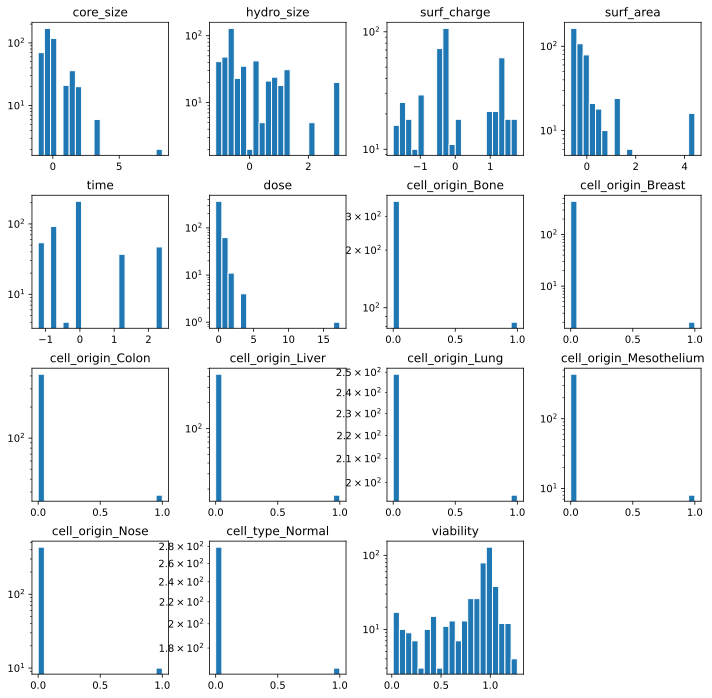

In [9]:
X.hist(figsize=(12, 12), bins=20, grid=False, edgecolor='white', log=True)

Text(0.5, 1.0, 'Correlation matrix')

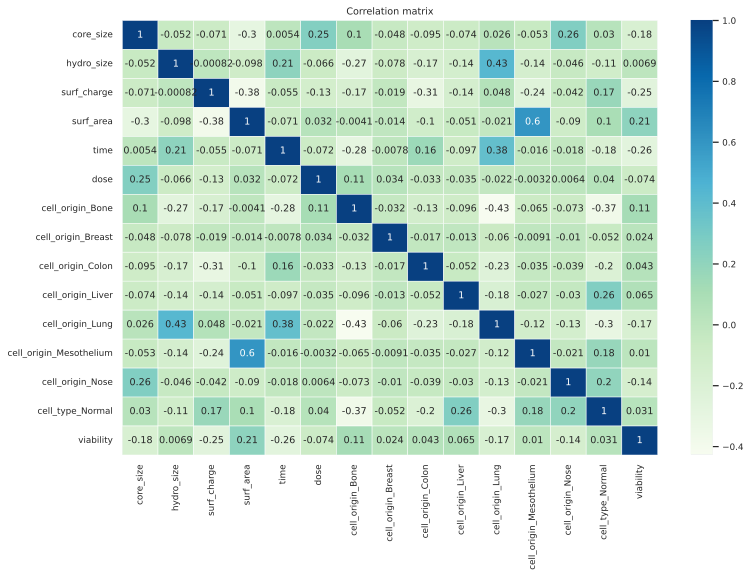

In [10]:
plt.figure(figsize=(12, 8))

sns.set(font_scale=0.8)
sns.heatmap(X.corr(), annot=True, linewidths=0.5, cmap='GnBu')

plt.title('Correlation matrix')

In [11]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :-1], X['viability'], test_size=0.33, shuffle=True, random_state=21)

In [13]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [14]:
from catboost import CatBoostRegressor

In [15]:
cbr_model = CatBoostRegressor(verbose=False)
cbr_model.fit(X_train, y_train)

R2:	0.991
MAE:	0.021
MSE:	0.001


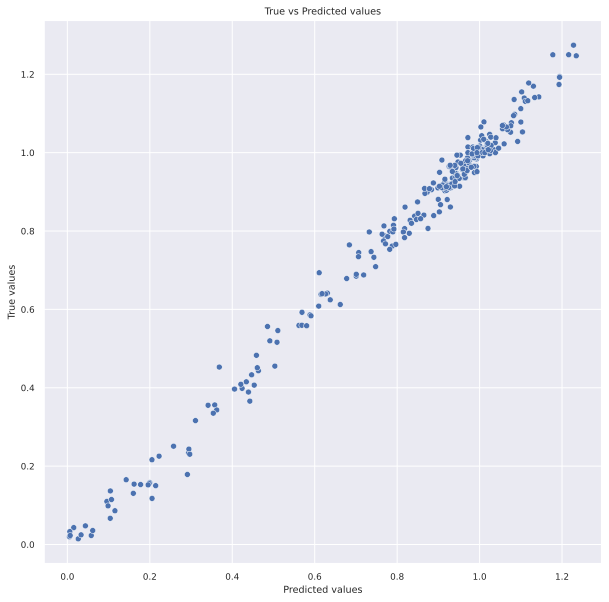

In [16]:
y_train_preds = cbr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.891
MAE:	0.06
MSE:	0.009


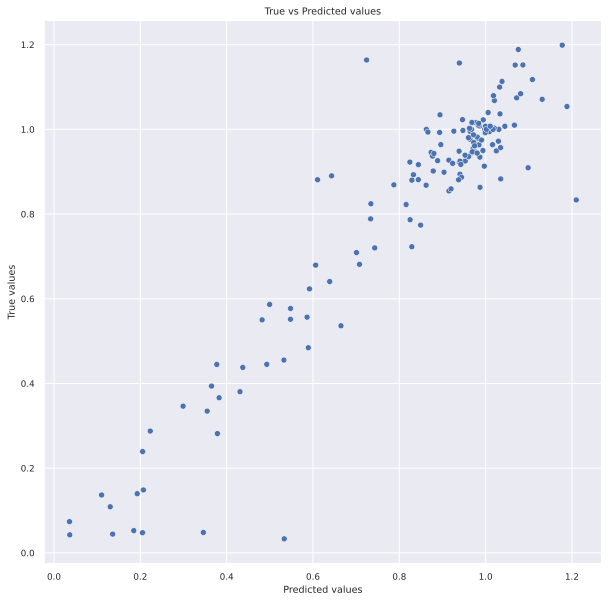

In [17]:
y_test_preds = cbr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [18]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 36.0 MB/s 


In [19]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [20]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(cbr_model)
shap_values = explainer.shap_values(X_test)

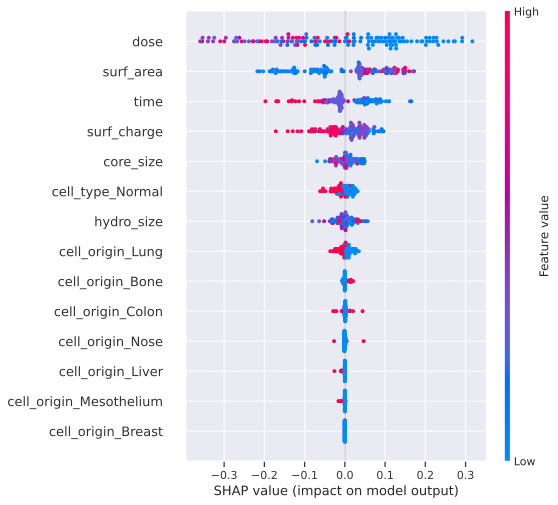

In [21]:
shap.summary_plot(shap_values, X_test)

In [38]:
pd.DataFrame(cbr_model.feature_importances_, index=cbr_model.feature_names_, columns=['values']).sort_values(by='values', ascending=False)

,values
dose,40.782373
surf_area,21.578450
surf_charge,9.617758
time,8.730680
core_size,6.563679
hydro_size,4.842723
cell_type_Normal,3.727522
cell_origin_Lung,2.341876
cell_origin_Bone,0.882268
cell_origin_Colon,0.594908
